# 1 Regularized Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from utils import *

In [3]:
data = loadmat('../data/ex5data1.mat')

X = data['X']
X = add_bais(X)
y = np.squeeze(data['y'])

Xtest = data['Xtest']
Xtest = add_bais(Xtest)
ytest = np.squeeze(data['ytest'])

Xval = data['Xval']
Xval = add_bais(Xval)
yval = np.squeeze(data['yval'])

## 1.1 Visualizing the dataset

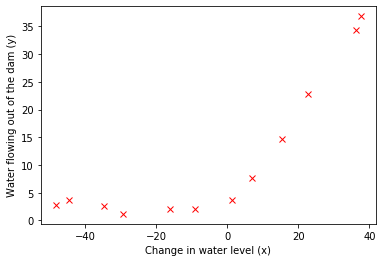

In [4]:
plt.plot(X[:,1], y, 'rx')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

## 1.2 Regularized linear regression cost function
code in utils.py

## 1.4 Fitting linear regression

Optimization terminated successfully.


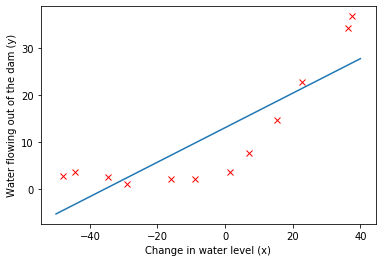

In [8]:
init_theta = np.ones(2)
theta = fit(init_theta,X,y)
x_range  = np.array([ [1, -50],
                        [ 1, 40]])
y_range = x_range.dot(theta)

plt.plot(X[:,1], y, 'rx')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(x_range[:,1], y_range)
plt.show()

# 2 Bias-variance

## 2.1 Learning curves

Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.


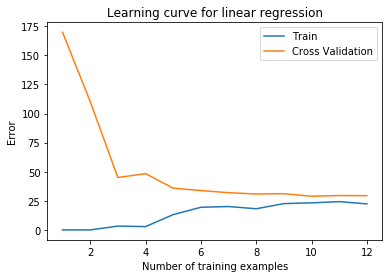

In [11]:
plot_learning_curve(X, y, Xval, yval)

# 3 Polynomial regression

## 3.1 Learning Polynomial Regression

Optimization terminated successfully.


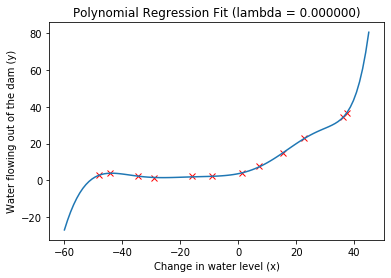

In [14]:
p = 8
X_poly8 = poly_features(X, p)

# compute mu and sigma of training set and use them to normelized all other featuers
mu = X_poly8[:,1:].mean(axis=0)
sigma = X_poly8[:,1:].std(axis=0)

X_poly8 = normalize(X_poly8, mu, sigma)

# training
init_theta8 = np.ones(p+1)
theta8 = fit(init_theta8, X_poly8, y)


# ploting
x_range = np.expand_dims(np.linspace(-60,45, 100), axis = 1)
X_range = poly_features(add_bais(x_range), p)
X_range = normalize(X_range,mu,sigma)

y_range = X_range.dot(theta8)

plt.plot(X[:,1], y, 'rx')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial Regression Fit (lambda = 0.000000)')
plt.plot(x_range, y_range)
plt.show()

Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.


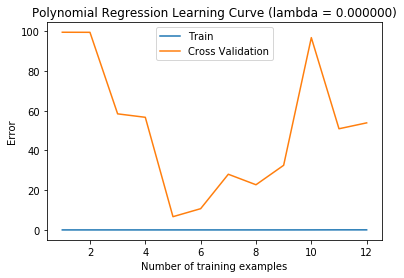

In [15]:
Xval_poly8 = poly_features(Xval, p)
Xval_poly8 = normalize(Xval_poly8, mu, sigma)
plot_learning_curve(X_poly8, y, Xval_poly8, yval)
plt.title('Polynomial Regression Learning Curve (lambda = 0.000000)')
plt.show()

### note: 
the graph we got above is not the same as what the exercise (figure 5). in the next cell i tried to figure out why is that. i plotted the hypothsis for every iterration. i saw that in the last few iterations the hypothsis has a very large raise in the end, which cause a large error in the validation most left point

Optimization terminated successfully.
1


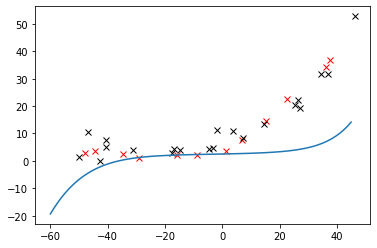

Optimization terminated successfully.
2


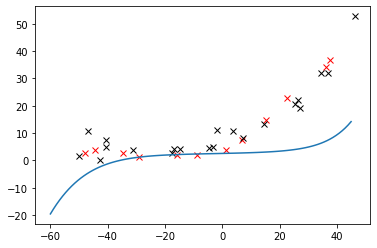

Optimization terminated successfully.
3


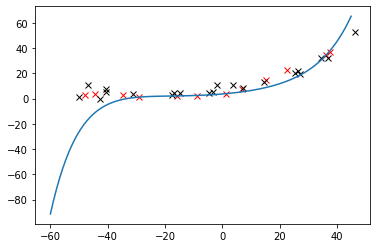

Optimization terminated successfully.
4


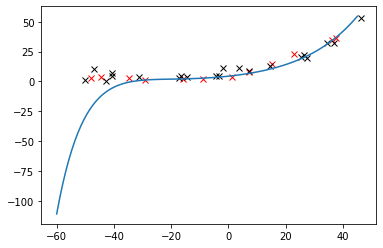

Optimization terminated successfully.
5


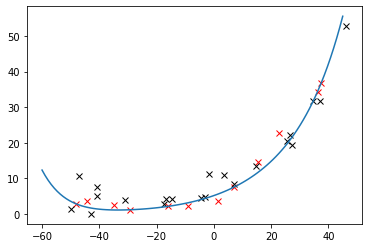

Optimization terminated successfully.
6


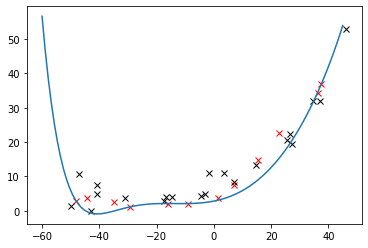

Optimization terminated successfully.
7


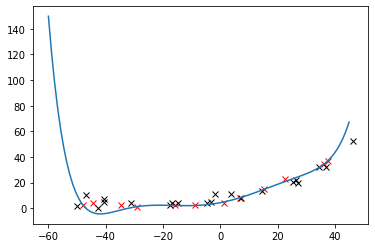

Optimization terminated successfully.
8


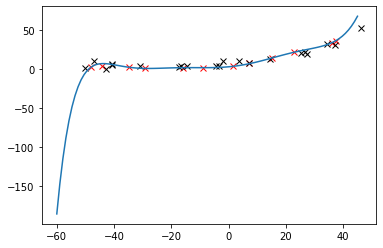

Optimization terminated successfully.
9


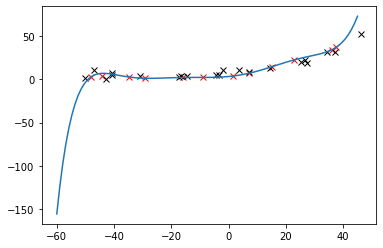

Optimization terminated successfully.
10


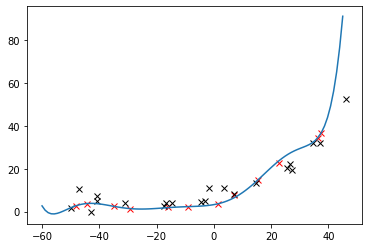

Optimization terminated successfully.
11


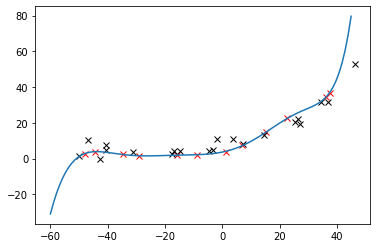

Optimization terminated successfully.
12


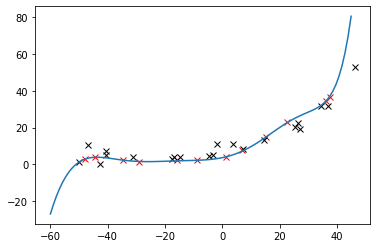

In [16]:
l=0

x_range = np.expand_dims(np.linspace(-60,45, 100), axis = 1)
X_range = poly_features(add_bais(x_range), p)
X_range = normalize(X_range,mu,sigma)

m = len(y)
train_err = np.zeros(m)
val_err = np.zeros(m)
init_theta = np.ones(X_poly8.shape[1])

for i in range(m):
    Xtrain = X_poly8[:(i+1)]
    ytrain = y[:(i+1)]
    theta = fit(init_theta,Xtrain, ytrain, l)
    y_range = X_range.dot(theta)
    
    
    # ploting
    print(i+1)
    plt.plot(X[:,1], y, 'rx')
    plt.plot(Xval[:,1], yval, 'kx')
    plt.plot(x_range, y_range)
    plt.show()

## 3.2  Adjusting the regularization parameter

Optimization terminated successfully.


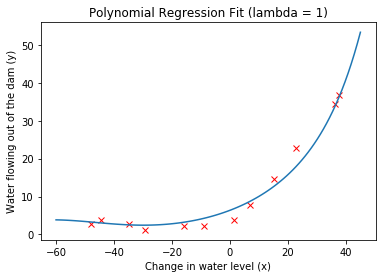

Optimization terminated successfully.


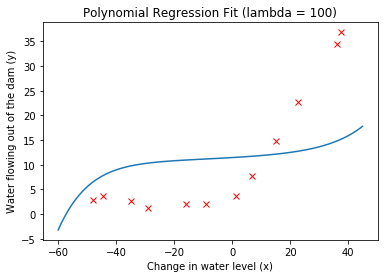

In [17]:
for l in [1, 100]:
    theta8 = fit(init_theta8, X_poly8, y , l)


    # ploting
    x_range = np.expand_dims(np.linspace(-60,45, 100), axis = 1)
    X_range = poly_features(add_bais(x_range), p)
    X_range = normalize(X_range,mu,sigma)

    y_range = X_range.dot(theta8)

    plt.plot(X[:,1], y, 'rx')
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    plt.title('Polynomial Regression Fit (lambda = %d)' % l)
    plt.plot(x_range, y_range)
    plt.show()

## 3.3 Selecting λ using a cross validation set

Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
best lambda is 3.000


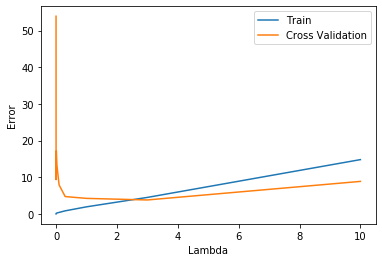

In [19]:
l_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
train_err, val_err = validation_curve(X_poly8, y, Xval_poly8, yval, l_vec)

plt.plot(l_vec, train_err, label='Train')
plt.plot(l_vec, val_err, label='Cross Validation')
# plt.title('Learning curve for linear regression')
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.legend()

best_l = l_vec[np.argmin(val_err)]
print('best lambda is %.3f' % best_l)

## 3.4 Computing test set error

In [20]:
init_theta8 = np.ones(X_poly8.shape[1])
best_theta = fit(init_theta8, X_poly8, y, best_l)

Xtest_poly8 = poly_features(Xtest, p)
Xtest_poly8 = normalize(Xtest_poly8, mu, sigma)

linear_reg_cost_function(best_theta, Xtest_poly8, ytest)

Optimization terminated successfully.


3.5716276174802886